%%html
<style>


  
.reveal pre code {
  font-size: 1em;
  line-height: 1;
}

.reveal pre {
  width: 120%;
  margin-left: -10%;
}


div.output_area pre {font-size:1 em; line-height:1em;}

table {font-size: 1em !important;}

</style>

## Pandas 
Python Data Analysis Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Series and DataFrame


<div style="font-size:0.5em; line-height:0.5em">

* enhanced **numpy** arrays 
* `Series` - single column; `DataFrame` - rows and columns
* `Series` - is a one-dimensional labeled array capable of holding any data type
* `DataFrame` - is a 2-dimensional labeled data structure with columns of potentially different types

Based on:

https://pandas.pydata.org/pandas-docs/stable/10min.html

https://pandas.pydata.org/pandas-docs/stable/dsintro.html

https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html

</div>

In [34]:
# creating a Series with default integer index
s1 = pd.Series([1,3,5,6,8])
s1

0    1
1    3
2    5
3    6
4    8
dtype: int64

In [35]:
s2 = pd.Series([1,3,5,np.nan, 6,8])
print(s2)
print(s2.values)  #values
print(s2.index)   #index  

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
[ 1.  3.  5. nan  6.  8.]
RangeIndex(start=0, stop=6, step=1)


In [36]:
array2= np.random.randn(5) 
#np.random.randn(5) creates an array of specified shape

print(type(array2))
s3 = pd.Series(array2 , index=['a', 'b', 'c', 'd', 'e']) 
s3

<class 'numpy.ndarray'>


a   -0.551563
b   -0.755469
c   -0.279882
d    2.092636
e    0.726300
dtype: float64

In [37]:
s4 = pd.Series(np.array([1,2,3,4,5]), 
               index=['a', 'b', 'c', 'd', 'e'])
print(s4.values)
s4


[1 2 3 4 5]


a    1
b    2
c    3
d    4
e    5
dtype: int32

In [38]:
print(s4['a'])      # Series are dict like
print(s4[0])        # Series are array like


1
1


In [39]:
print(s4[:3])       # slicing 


a    1
b    2
c    3
dtype: int32


In [40]:

print(s4[[4,2,3]])  # selection 


e    5
c    3
d    4
dtype: int32


In [41]:
print(s4.median())  # prints 3
print(s4[s4 > 3])   # selection
'a' in s4

3.0
d    4
e    5
dtype: int32


True

In [42]:
s5=s4.cumsum() #cummulative sum s[0], s[0]+s[1], ...
print(s5)

a     1
b     3
c     6
d    10
e    15
dtype: int32


In [43]:
s6 = pd.Series(np.array(['a','b','c','d','e']), 
               index=[1,2,3,4,5])
s7 = s6.cumsum()
s7

1        a
2       ab
3      abc
4     abcd
5    abcde
dtype: object

In [44]:
s6.max()


'e'

In [45]:
#Series from dicts
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [46]:
# DataFrame as sequence of Series

area_dict = {'California': 423967, 'Texas': 695662,
             'New York': 141297, 'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [47]:
print(states.index) 
print(states.columns)
states['area']  # returns the series

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [48]:
states.transpose()

,California,Texas,New York,Florida,Illinois
population,38332521,26448193,19651127,19552860,12882135
area,423967,695662,141297,170312,149995


In [49]:
states.describe()  #statistics

,population,area
count,5.000000e+00,5.000000
mean,2.337337e+07,316246.600000
std,9.640386e+06,242437.411951
min,1.288214e+07,141297.000000
25%,1.955286e+07,149995.000000
50%,1.965113e+07,170312.000000
75%,2.644819e+07,423967.000000
max,3.833252e+07,695662.000000


In [50]:
states.sort_values(by="population")

,population,area
Illinois,12882135,149995
Florida,19552860,170312
New York,19651127,141297
Texas,26448193,695662
California,38332521,423967


In [51]:
# DataFrame from dicts
dfdict1 = pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}])
dfdict1


,a,b
0,1,2
1,3,4


In [52]:
# DataFrame from dicts - missing values are NaN
dfdict2 = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])
dfdict2

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [53]:
# DataFrame from two dimensional array
# with given columns and indexes

df1 = pd.DataFrame(np.random.rand(3, 2),
                   columns=['foo', 'bar'],
                   index=['a', 'b', 'c'])
df1

,foo,bar
a,0.793145,0.045078
b,0.538988,0.145115
c,0.238283,0.879382


In [54]:
dates = pd.date_range('20130101', periods=4)

df2 = pd.DataFrame(np.random.randn(4,4), 
                   index=dates, 
                   columns=list('ABCD'))
df2

,A,B,C,D
2013-01-01,0.769836,-0.047813,-0.501817,-0.350693
2013-01-02,0.846612,-0.227917,0.649149,-0.435248
2013-01-03,-0.136776,0.035975,-0.333368,-0.299277
2013-01-04,-1.590309,-1.140489,1.090764,0.317354


In [55]:
df3 = pd.DataFrame({ 'A' : 1.,
                     'B' : dates,
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(['test','train','test', 'train']),
                     'F' : 'foo' })
df3

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [56]:
df3.head()

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [57]:
df3.tail(2)

,A,B,C,D,E,F
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [58]:
df3.loc[0:2,['A','C']]

,A,C
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


In [59]:
df3.loc[3,'B']

Timestamp('2013-01-04 00:00:00')

In [60]:
#Grouping
dfex= pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
dfex

,A,B,C,D
0,foo,one,-0.955060,-2.148457
1,bar,one,0.300307,-0.806183
2,foo,two,0.354251,-0.618628
3,bar,three,1.177041,-0.507676
4,foo,two,0.945079,-0.400977
5,bar,two,-1.288940,1.213276
6,foo,one,0.106708,0.103104
7,foo,three,-0.616972,-1.086366


In [61]:
# grouping 
# split-apply-combine
# https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby

grouped = dfex.groupby('A')
grouped.max()

,B,C,D
A,,,
bar,two,1.177041,1.213276
foo,two,0.945079,0.103104


In [62]:
dfex['values']= dfex['B'].astype('category')
dfex['values']                               

0      one
1      one
2      two
3    three
4      two
5      two
6      one
7    three
Name: values, dtype: category
Categories (3, object): [one, three, two]

In [63]:
# dfex.sort_values(by='B') will order the values from 'B' as strings
# we can re-order the values "one", "two", "three" using categories
# https://pandas.pydata.org/pandas-docs/stable/categorical.html

dfex['values'] = dfex['values'].cat.set_categories(["one", "two", "three"])
dfex_sorted_values = dfex.sort_values(by='values')
dfex_sorted_values

,A,B,C,D,values
0,foo,one,-0.955060,-2.148457,one
1,bar,one,0.300307,-0.806183,one
6,foo,one,0.106708,0.103104,one
2,foo,two,0.354251,-0.618628,two
4,foo,two,0.945079,-0.400977,two
5,bar,two,-1.288940,1.213276,two
3,bar,three,1.177041,-0.507676,three
7,foo,three,-0.616972,-1.086366,three


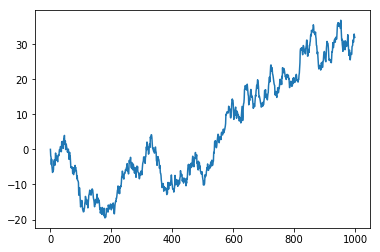

In [64]:
# Plotting

xs = pd.Series(np.random.randn(1000), 
               index=np.arange(1000))
xs.cumsum().plot()

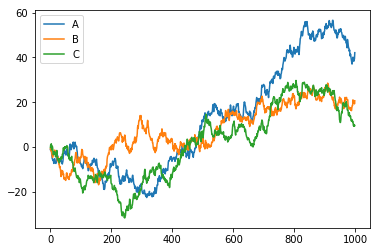

In [65]:
# Plotting
xdf = pd.DataFrame(np.random.randn(1000,3), 
                   index=np.arange(1000), 
                   columns = ['A','B','C'])
xdf.cumsum().plot()

###  Next topic: Introduction to ML with Python